# Handwritten digits classification using Tensorflow low level api multiclass classifier

# 0 - IMPORTS

In [10]:
import tensorflow as tf
import numpy as np
import warnings
import matplotlib.pyplot as plt


from tensorflow.examples.tutorials.mnist import input_data


warnings.filterwarnings('ignore')
%matplotlib inline

# 0 - LOAD DATASET

In [4]:
mnist = input_data.read_data_sets('mnist/', one_hot = True)

Extracting mnist/train-images-idx3-ubyte.gz
Extracting mnist/train-labels-idx1-ubyte.gz
Extracting mnist/t10k-images-idx3-ubyte.gz
Extracting mnist/t10k-labels-idx1-ubyte.gz


# 1 - CREATE TRAIN & TEST DATASET

In [7]:
X_train = mnist.train.images
y_train = mnist.train.labels
X_test  = mnist.test.images
y_test  = mnist.test.labels

print('Train dataset: {} rows,  {} columns\n'.format(X_train.shape[0], X_train.shape[1]) )
print('Test dataset: {} rows,  {} columns'.format(X_test.shape[0], X_test.shape[1]) )

Train dataset: 55000 rows,  784 columns

Test dataset: 10000 rows,  784 columns


In [8]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [9]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

## 1.1 View handwritten image 

Text(0.5, 1.0, 'Classe: 7')

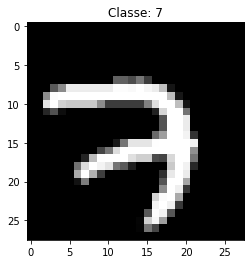

In [13]:
plt.imshow(X_train[0].reshape((28,28)), cmap = 'gray') # reshape to matrix 28x28. 28 pixel x 28 pixel dimension for image data
plt.title('Classe: ' + str(np.argmax(y_train[0])))

# 2 - CREATE MODEL

## 2.1 - Define Neural Network Structure 

In [20]:
input_layer    = X_train.shape[1]
hidden_layer_1 = int((X_train.shape[1] + y_train.shape[1]) / 2)
hidden_layer_2 = hidden_layer_1
hidden_layer_3 = hidden_layer_1
output_layer   = y_train.shape[1]

print('Neural Network Structure\n\nInput layer neurons    : {}\nHidden layer 1 neurons : {}\nHidden layer 2 neurons : {}\nHidden layer 3 neurons : {}\nOutput layer neurons   : {}'.format(input_layer, hidden_layer_1, hidden_layer_2, hidden_layer_3, output_layer)) 

Neural Network Structure

Input layer neurons    : 784
Hidden layer 1 neurons : 397
Hidden layer 2 neurons : 397
Hidden layer 3 neurons : 397
Output layer neurons   : 10


## 2.2 Create Tensor Weight Variables 

In [21]:
W = {'hidden_1': tf.Variable( tf.random_normal( [input_layer,    hidden_layer_1] ) ),
     'hidden_2': tf.Variable( tf.random_normal( [hidden_layer_1, hidden_layer_2] ) ),
     'hidden_3': tf.Variable( tf.random_normal( [hidden_layer_2, hidden_layer_3] ) ),
     'output'  : tf.Variable( tf.random_normal( [hidden_layer_3, output_layer] ) ) 
}

## 2.3 Create Tensor Bias Variables 

In [24]:
b = {'hidden_1': tf.Variable( tf.random_normal( [hidden_layer_1] ) ),
     'hidden_2': tf.Variable( tf.random_normal( [hidden_layer_2] ) ),
     'hidden_3': tf.Variable( tf.random_normal( [hidden_layer_3] ) ),
     'output'  : tf.Variable( tf.random_normal( [output_layer] ) )   
}

## 2.4 Create Tensor Placeholders Variables 

In [25]:
xph = tf.placeholder('float', [None, input_layer])
yph = tf.placeholder('float', [None, output_layer])

## 2.5 Define Model Function 

In [26]:
def mlp(x, W, bias):
    hidden_layer_1 = tf.nn.relu( tf.add( tf.matmul( x, W['hidden_1'] ), bias['hidden_1'] ) )
    hidden_layer_2 = tf.nn.relu( tf.add( tf.matmul( hidden_layer_1, W['hidden_2']), bias['hidden_2'] ) )
    hidden_layer_3 = tf.nn.relu( tf.add( tf.matmul( hidden_layer_2, W['hidden_3']), bias['hidden_3'] ) )
    output_layer   = tf.add( tf.matmul( hidden_layer_3, W['output'] ), bias['output'] )
    return output_layer

# 3 - TRAINING MODEL

## 3.1 - Define Model and Optimizers Variable

In [28]:
mlp_model           = mlp(xph, W, b)
mlp_model_error     = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits_v2(logits = mlp_model, labels = yph))
mlp_model_optimizer = tf.train.AdamOptimizer( learning_rate = 0.0001).minimize(mlp_model_error)

## 3.1 - Define Predictions Variable

In [32]:
mlp_model_prediction         = tf.nn.softmax(mlp_model)
mlp_model_correct_prediction = tf.equal(tf.argmax(mlp_model_prediction, 1), tf.argmax(yph, 1))
mlp_model_accuracy           = tf.reduce_mean(tf.cast(mlp_model_correct_prediction, tf.float32))

## 3.1 - Train Model

In [38]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(5000):
        X_batch, y_batch = mnist.train.next_batch(128)
        _, cost = sess.run([mlp_model_optimizer, mlp_model_error], feed_dict = {xph: X_batch, yph: y_batch})
        if epoch % 100 == 0:
            acc = sess.run([mlp_model_accuracy], feed_dict = {xph: X_batch, yph: y_batch})
            print('Epoch: ' + str((epoch + 1)) + ' Model error: ' + str(cost) + ' Model accuracy: ' + str(acc))
            
    print('Training Done!')
    print('Model Accuracy: {}'.format(sess.run(mlp_model_accuracy, feed_dict = {xph: X_test, yph: y_test})))

Epoch: 1 Model error: 31515.207 Model accuracy: [0.1015625]
Epoch: 101 Model error: 17469.93 Model accuracy: [0.1640625]
Epoch: 201 Model error: 9471.696 Model accuracy: [0.40625]
Epoch: 301 Model error: 6401.4355 Model accuracy: [0.5]
Epoch: 401 Model error: 6071.3 Model accuracy: [0.484375]
Epoch: 501 Model error: 4327.716 Model accuracy: [0.65625]
Epoch: 601 Model error: 3717.2202 Model accuracy: [0.7109375]
Epoch: 701 Model error: 3701.4302 Model accuracy: [0.703125]
Epoch: 801 Model error: 2617.9897 Model accuracy: [0.75]
Epoch: 901 Model error: 2192.6565 Model accuracy: [0.78125]
Epoch: 1001 Model error: 2570.5967 Model accuracy: [0.7734375]
Epoch: 1101 Model error: 2201.739 Model accuracy: [0.7890625]
Epoch: 1201 Model error: 1453.5481 Model accuracy: [0.8203125]
Epoch: 1301 Model error: 2250.1802 Model accuracy: [0.7734375]
Epoch: 1401 Model error: 2065.444 Model accuracy: [0.7578125]
Epoch: 1501 Model error: 2159.879 Model accuracy: [0.78125]
Epoch: 1601 Model error: 2184.6772